[I 2024-11-23 14:51:36,976] A new study created in memory with name: no-name-d39ac6cd-005a-4c11-b7bd-17604d9e12c1
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at zhihan1996/DNABERT-2-117M and are newly initialized: ['bert.embeddings.position_embeddings.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.0.attention.self.value.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.output.LayerNorm.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output.dense.bias', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.1.attention.self.key.bias', 'bert.encoder.layer.1.attention.self.key.weight', 'bert.encode

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.632800,0.553598,0.738000,0.769565,0.694118,0.729897
2,0.585900,0.547329,0.721000,0.689655,0.823529,0.750670
3,0.553000,0.534915,0.749000,0.742964,0.776471,0.759348


[I 2024-11-23 14:53:08,556] Trial 0 finished with value: 0.749 and parameters: {'learning_rate': 2.003504707475278e-05, 'batch_size': 8, 'num_train_epochs': 3}. Best is trial 0 with value: 0.749.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at zhihan1996/DNABERT-2-117M and are newly initialized: ['bert.embeddings.position_embeddings.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.0.attention.self.value.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.output.LayerNorm.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output.dense.bias', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.1.attent

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.617996,0.684000,0.792169,0.515686,0.624703
2,0.660800,0.607520,0.709000,0.731501,0.678431,0.703967
3,0.660800,0.578805,0.711000,0.708885,0.735294,0.721848
4,0.633000,0.565602,0.723000,0.750538,0.684314,0.715897


[I 2024-11-23 14:54:16,619] Trial 1 finished with value: 0.723 and parameters: {'learning_rate': 3.413398481494724e-05, 'batch_size': 16, 'num_train_epochs': 4}. Best is trial 0 with value: 0.749.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at zhihan1996/DNABERT-2-117M and are newly initialized: ['bert.embeddings.position_embeddings.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.0.attention.self.value.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.output.LayerNorm.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output.dense.bias', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.1.atten

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.541928,0.735000,0.752577,0.715686,0.733668
2,0.612600,0.533640,0.740000,0.761506,0.713725,0.736842


[I 2024-11-23 14:54:54,306] Trial 2 finished with value: 0.74 and parameters: {'learning_rate': 2.7494282478611138e-05, 'batch_size': 16, 'num_train_epochs': 2}. Best is trial 0 with value: 0.749.


Best hyperparameters: {'learning_rate': 2.003504707475278e-05, 'batch_size': 8, 'num_train_epochs': 3}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at zhihan1996/DNABERT-2-117M and are newly initialized: ['bert.embeddings.position_embeddings.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.0.attention.self.value.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.output.LayerNorm.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output.dense.bias', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.1.attention.self.key.bias', 'bert.encoder.layer.1.attention.self.key.weight', 'bert.encoder.layer.1.attention.self.query.bias', 'bert.encoder.layer.1.attention.self.query.weight', 'bert.encoder.layer.1.at

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.635800,0.548866,0.745000,0.754491,0.741176,0.747774
2,0.586600,0.549685,0.718000,0.680952,0.841176,0.752632
3,0.554500,0.537182,0.743000,0.728752,0.790196,0.758231


Test Results: {'eval_loss': 0.5488656759262085, 'eval_accuracy': 0.745, 'eval_precision': 0.7544910179640718, 'eval_recall': 0.7411764705882353, 'eval_f1': 0.7477744807121662, 'eval_runtime': 1.3335, 'eval_samples_per_second': 749.921, 'eval_steps_per_second': 93.74, 'epoch': 3.0}


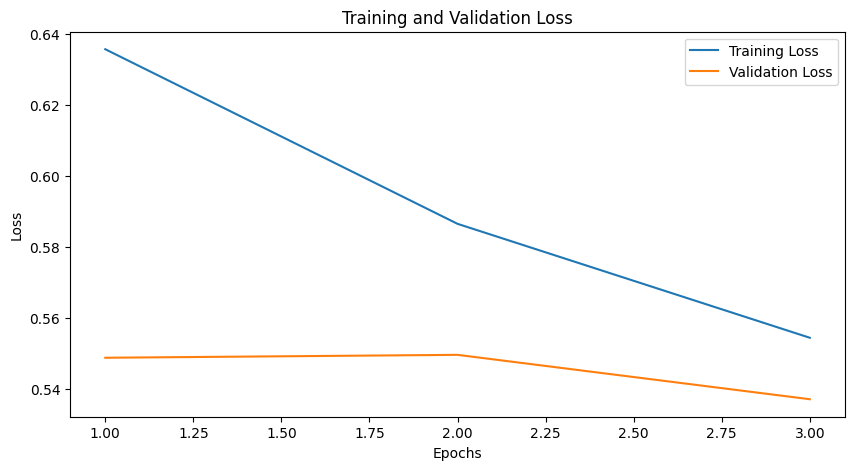

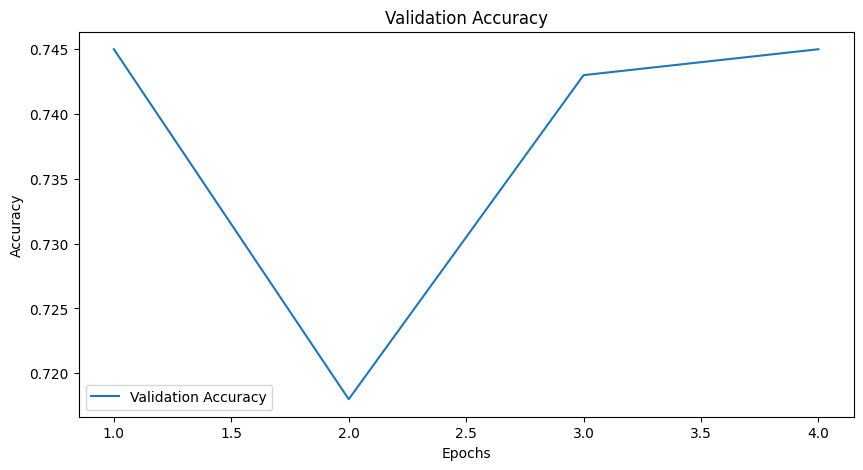

In [31]:
from transformers import AutoTokenizer, BertConfig, BertForSequenceClassification, TrainingArguments, Trainer
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import optuna
import matplotlib.pyplot as plt

dataset = load_dataset("katarinagresova/Genomic_Benchmarks_human_enhancers_cohn")

tokenizer = AutoTokenizer.from_pretrained("zhihan1996/DNABERT-2-117M", trust_remote_code=True)

def tokenize_function(example):
    return tokenizer(example['seq'], truncation=True, padding="max_length", max_length=256)

tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(5000))
test_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average="binary", zero_division=0)
    recall = recall_score(labels, predictions, average="binary", zero_division=0)
    f1 = f1_score(labels, predictions, average="binary", zero_division=0)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 2e-5, 5e-4, log=True)
    batch_size = trial.suggest_categorical("batch_size", [8, 16])
    num_train_epochs = trial.suggest_int("num_train_epochs", 2, 5)

    config = BertConfig.from_pretrained("zhihan1996/DNABERT-2-117M", num_labels=2)
    model = BertForSequenceClassification.from_pretrained(
        "zhihan1996/DNABERT-2-117M",
        config=config,
    )

    training_args = TrainingArguments(
        output_dir="./results",
        eval_strategy="epoch",
        save_strategy="epoch",
        learning_rate=learning_rate,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=num_train_epochs,
        weight_decay=0.01,
        logging_dir="./logs",
        fp16=True,
        save_total_limit=1,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
    )

    trainer.train()
    results = trainer.evaluate()
    return results["eval_accuracy"]

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=3)

print("Best hyperparameters:", study.best_params)

config = BertConfig.from_pretrained("zhihan1996/DNABERT-2-117M", num_labels=2)
model = BertForSequenceClassification.from_pretrained(
    "zhihan1996/DNABERT-2-117M",
    config=config,
)

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=study.best_params["learning_rate"],
    per_device_train_batch_size=study.best_params["batch_size"],
    per_device_eval_batch_size=study.best_params["batch_size"],
    num_train_epochs=study.best_params["num_train_epochs"],
    weight_decay=0.01,
    logging_dir="./logs",
    fp16=True,
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

results = trainer.evaluate()
print("Test Results:", results)

history = trainer.state.log_history
train_loss = [log["loss"] for log in history if "loss" in log]
val_loss = [log["eval_loss"] for log in history if "eval_loss" in log]
train_accuracy = [log["eval_accuracy"] for log in history if "eval_accuracy" in log]

num_epochs = min(len(train_loss), len(val_loss))
epochs = range(1, num_epochs + 1)

train_loss = train_loss[:num_epochs]
val_loss = val_loss[:num_epochs]

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.show()